# Feed activity

Plots of how active the feed has been in some given time period.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime, timedelta, date
from pathlib import Path

In [2]:
posts = pd.read_parquet("../data/feed_astro_posts.parquet")  # Requires running download_posts.py
accounts = pd.read_parquet("../data/accounts.parquet")

## Pre-process into valid posts only

In [3]:
print("Posts before:", len(posts))
posts = posts.loc[np.isin(posts['author'], accounts.query("is_valid == 1")["did"])].reset_index(drop=True)
print("Posts after:", len(posts))

# Also, join handles into posts
posts = posts.merge(accounts[["did", "handle"]], left_on="author", right_on="did", how="left")

Posts before: 24720
Posts after: 24603


## Posts over time

In [4]:
posts

,id,indexed_at,uri,cid,author,text,feed_all,feed_astro,feed_astrophotos,feed_cosmology,...,feed_instrumentation,feed_methods,feed_milkyway,feed_planetary,feed_radio,feed_stellar,feed_education,feed_history,did,handle
0,208,2023-07-09 20:07:37,at://did:plc:jcoy7v3a2t4rcfdh6i4kza25/app.bsky...,zdpuAtchhhJhqsCDexTy4vMA6eyf2zW2MRQVTQy9soT9bSy26,did:plc:jcoy7v3a2t4rcfdh6i4kza25,"cheeky test post, if this works then we have a...",1,1,0,0,...,0,0,0,0,0,0,0,0,did:plc:jcoy7v3a2t4rcfdh6i4kza25,emily.space
1,210,2023-07-09 20:11:45,at://did:plc:jcoy7v3a2t4rcfdh6i4kza25/app.bsky...,zdpuB1yNordR5vcfviTxugNsDWAmF9re1jrJG4xrjJxGjUJpy,did:plc:jcoy7v3a2t4rcfdh6i4kza25,"Astronomers of Bluesky (Astroskeets?), we have...",1,1,0,0,...,0,0,0,0,0,0,0,0,did:plc:jcoy7v3a2t4rcfdh6i4kza25,emily.space
2,212,2023-07-09 20:17:25,at://did:plc:jcoy7v3a2t4rcfdh6i4kza25/app.bsky...,zdpuB2CJrDkLfmvHNh7oyniBdT7CfxhRXQCwyZgfi1oXaMRgH,did:plc:jcoy7v3a2t4rcfdh6i4kza25,"The Astrosky feed will still be supported, and...",1,1,0,0,...,0,0,0,0,0,0,0,0,did:plc:jcoy7v3a2t4rcfdh6i4kza25,emily.space
3,213,2023-07-09 20:23:19,at://did:plc:5jewtobl3twykx3n7iihg4qo/app.bsky...,zdpuAoEWvds81pTtG6EzcEB9HZLNsJvoj2EDCRQFVzakc1sYv,did:plc:5jewtobl3twykx3n7iihg4qo,For the astronomy feed: ????,1,1,0,0,...,0,0,0,0,0,0,0,0,did:plc:5jewtobl3twykx3n7iihg4qo,astroprofhoff.bsky.social
4,221,2023-07-09 20:56:21,at://did:plc:jcoy7v3a2t4rcfdh6i4kza25/app.bsky...,zdpuAnCPJpNpwyogZLHsziPpbfzE7dwxpyqUJU7fPb8db9iD3,did:plc:jcoy7v3a2t4rcfdh6i4kza25,Time for an astronomy post! ????????\n\nMy abs...,1,1,0,0,...,0,0,0,0,0,0,0,0,did:plc:jcoy7v3a2t4rcfdh6i4kza25,emily.space
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24860,546211,2024-11-18 07:40:56,at://did:plc:ttidnpgvz5iznykszgu76rty/app.bsky...,bafyreifbqb3ibgxqs6nynaycaxaznaa2zjqhr3lm6hc6y...,did:plc:ttidnpgvz5iznykszgu76rty,M27 aka the Dumbbell Nebula www.astrobin.com/...,1,1,0,0,...,0,0,0,0,0,0,0,0,did:plc:ttidnpgvz5iznykszgu76rty,astrovancea.bsky.social
24861,546211,2024-11-18 07:40:56,at://did:plc:ttidnpgvz5iznykszgu76rty/app.bsky...,bafyreifbqb3ibgxqs6nynaycaxaznaa2zjqhr3lm6hc6y...,did:plc:ttidnpgvz5iznykszgu76rty,M27 aka the Dumbbell Nebula www.astrobin.com/...,1,1,0,0,...,0,0,0,0,0,0,0,0,did:plc:ttidnpgvz5iznykszgu76rty,astrovancea.bsky.social
24862,546230,2024-11-18 08:00:14,at://did:plc:btzjjptgouva43ko4ip5pl67/app.bsky...,bafyreifcnbwduessubpzkeyrrbft6ws55igztqlmpweew...,did:plc:btzjjptgouva43ko4ip5pl67,Stars and Dust in the Pacman Nebula - ©\nMalco...,1,1,1,0,...,0,0,0,0,0,0,0,0,did:plc:btzjjptgouva43ko4ip5pl67,apod.shinyakato.dev
24863,546237,2024-11-18 08:02:28,at://did:plc:vn6blpoqzevgxe4cxityopyj/app.bsky...,bafyreihp7457jftvu2dc3g4ovlvuatkxuc36xx7aan3py...,did:plc:vn6blpoqzevgxe4cxityopyj,Astrophotographes amateurs: que diriez-vous d'...,1,1,1,0,...,0,0,0,0,0,0,0,0,did:plc:vn6blpoqzevgxe4cxityopyj,clementpiel.bsky.social


In [5]:
aggregator = dict(
    feed_astro="sum", feed_exoplanets="sum", feed_astrophotos="sum", author="nunique"
)

by_day = posts.groupby(by=posts["indexed_at"].dt.date).aggregate(aggregator).reset_index()
by_day_of_the_week = posts.groupby(by=posts["indexed_at"].dt.strftime('%w')).aggregate(aggregator).reset_index()
by_week = posts.groupby(by=posts["indexed_at"].dt.strftime('%Y%W')).aggregate(aggregator).reset_index()
by_month = posts.groupby(by=posts["indexed_at"].dt.strftime('%Y%m')).aggregate(aggregator).reset_index()

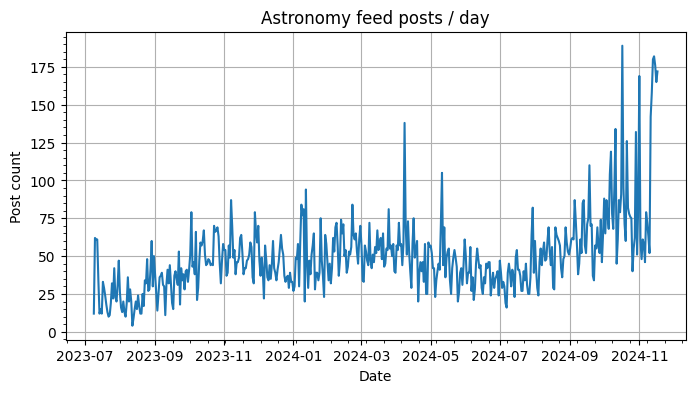

In [6]:
days_to_plot = by_day.iloc[:-1]  # Exclude today

fig, ax = plt.subplots(figsize=(8, 4), facecolor="w")
ax.plot(days_to_plot['indexed_at'], days_to_plot['feed_astro'])
ax.set(title="Astronomy feed posts / day", xlabel="Date", ylabel="Post count")
ax.grid()
ax.minorticks_on()

fig.savefig("output/posts_per_day.png", bbox_inches="tight")

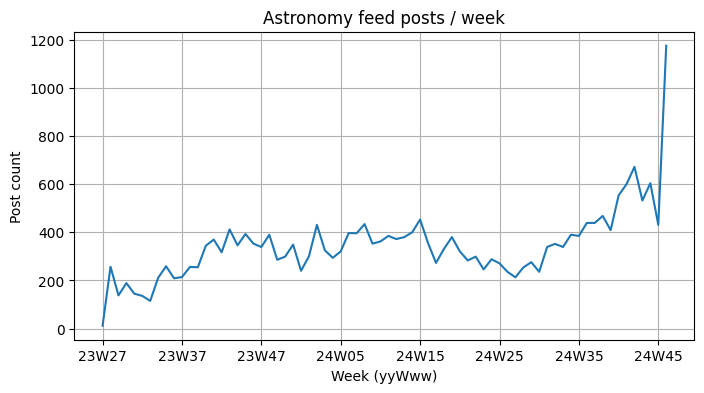

In [18]:
#days_to_plot = by_week.iloc[:-1]  # Exclude today

fig, ax = plt.subplots(figsize=(8, 4), facecolor="w")
weeks = [f"{x[2:4]}W{x[4:]}" for x in days_to_plot['indexed_at']]
ax.plot(weeks, days_to_plot['feed_astro'])
ax.set(title="Astronomy feed posts / week", xlabel="Week (yyWww)", ylabel="Post count")
ax.grid()
ax.xaxis.set_major_locator(plt.MaxNLocator(8))
#ax.minorticks_on()

fig.savefig("output/posts_per_week.png", bbox_inches="tight")

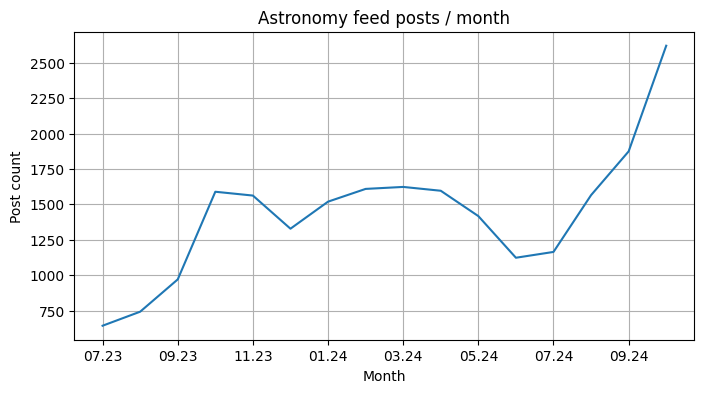

In [24]:
days_to_plot = by_month.iloc[:-1]  # Exclude today

fig, ax = plt.subplots(figsize=(8, 4), facecolor="w")
months = [f"{x[4:]}.{x[2:4]}" for x in days_to_plot['indexed_at']]
ax.plot(months, days_to_plot['feed_astro'])
ax.set(title="Astronomy feed posts / month", xlabel="Month", ylabel="Post count")
ax.grid()
#ax.minorticks_on()
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

fig.savefig("output/posts_per_month.png", bbox_inches="tight")

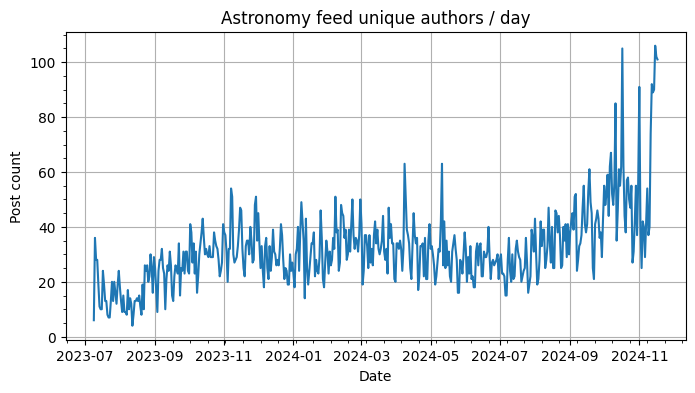

In [25]:
days_to_plot = by_day.iloc[:-1]  # Exclude today

fig, ax = plt.subplots(figsize=(8, 4), facecolor="w")
# ax.plot(days_to_plot['indexed_at'], days_to_plot['feed_astro'])
ax.plot(days_to_plot['indexed_at'], days_to_plot['author'])
ax.set(title="Astronomy feed unique authors / day", xlabel="Date", ylabel="Post count")
ax.grid()
ax.minorticks_on()

fig.savefig("output/authors_per_day.png", bbox_inches="tight")

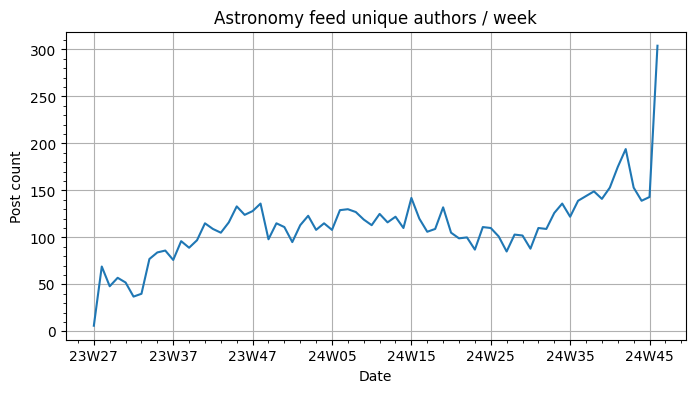

In [59]:
days_to_plot = by_week.iloc[:-1]  # Exclude today

fig, ax = plt.subplots(figsize=(8, 4), facecolor="w")
weeks = [f"{x[2:4]}W{x[4:]}" for x in days_to_plot['indexed_at']]
ax.plot(weeks, days_to_plot['author'])
ax.set(title="Astronomy feed unique authors / week", xlabel="Date", ylabel="Post count")
ax.grid()
ax.minorticks_on()
ax.xaxis.set_major_locator(plt.MaxNLocator(8))

fig.savefig("output/authors_per_week.png", bbox_inches="tight")

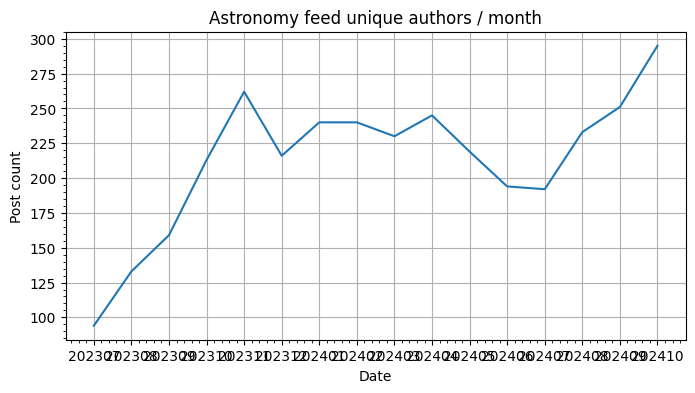

In [60]:
days_to_plot = by_month.iloc[:-1]  # Exclude today

fig, ax = plt.subplots(figsize=(8, 4), facecolor="w")
# ax.plot(days_to_plot['indexed_at'], days_to_plot['feed_astro'])
ax.plot(days_to_plot['indexed_at'], days_to_plot['author'])
ax.set(title="Astronomy feed unique authors / month", xlabel="Date", ylabel="Post count")
ax.grid()
ax.minorticks_on()

fig.savefig("output/authors_per_month.png", bbox_inches="tight")

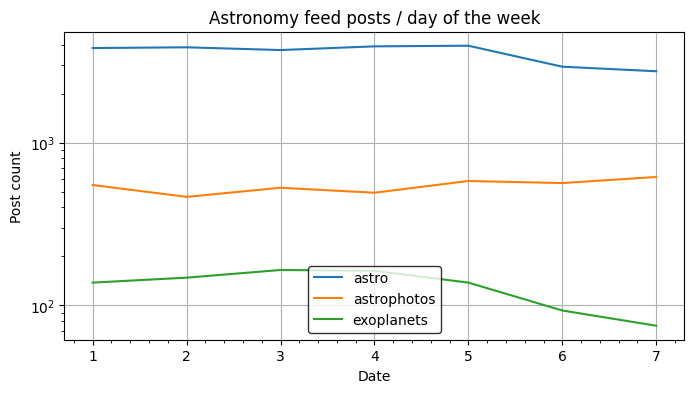

In [28]:
days_to_plot = by_day_of_the_week.copy()
days_to_plot['indexed_at'] = (days_to_plot['indexed_at'].astype(int) + 6) % 7 + 1
days_to_plot = days_to_plot.sort_values("indexed_at")

fig, ax = plt.subplots(figsize=(8, 4), facecolor="w")
# ax.plot(days_to_plot['indexed_at'], days_to_plot['feed_astro'])
ax.plot(days_to_plot['indexed_at'], days_to_plot['feed_astro'], label="astro")
ax.plot(days_to_plot['indexed_at'], days_to_plot['feed_astrophotos'], label="astrophotos")
ax.plot(days_to_plot['indexed_at'], days_to_plot['feed_exoplanets'], label="exoplanets")
ax.set(title="Astronomy feed posts / day of the week", xlabel="Date", ylabel="Post count", yscale="log")
ax.grid()
ax.minorticks_on()
ax.legend(edgecolor="k")

fig.savefig("output/posts_per_day_of_the_week.png", bbox_inches="tight")

## Authors over time

In [30]:
valid_accounts = accounts.query("is_valid == 1").reset_index(drop=True)

In [56]:
aggregator = dict(handle="count")

# So that we don't have missing days
start_day = valid_accounts["indexed_at"].dt.date.min()
n_days = (datetime.today().date() - start_day).days
date_list = [start_day + timedelta(days=x) for x in range(n_days + 1)]

signups_per_day = (
    valid_accounts.groupby(by=valid_accounts["indexed_at"].dt.date)
    .aggregate(aggregator)
    .rename(columns=dict(handle="signups"))
    .reset_index()
)

signups_per_day_all_days = (
    pd.DataFrame.from_dict({"indexed_at": date_list, "signups": 0})
    .set_index("indexed_at"))
signups_per_day_all_days.update(signups_per_day.set_index("indexed_at"))
signups_per_day = signups_per_day_all_days.reset_index()

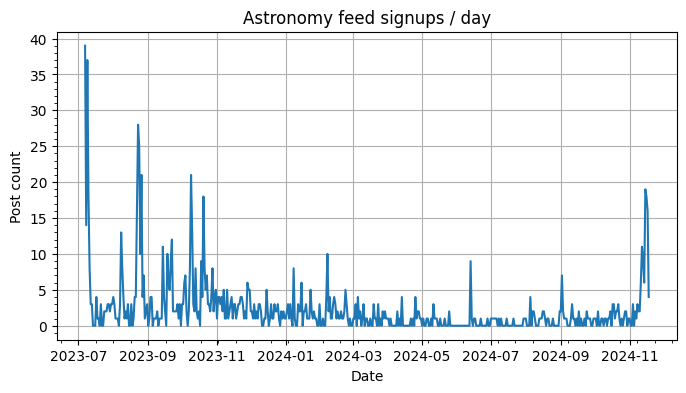

In [57]:
days_to_plot = by_day.iloc[:-1]  # Exclude today

fig, ax = plt.subplots(figsize=(8, 4), facecolor="w")
ax.plot(signups_per_day['indexed_at'], signups_per_day['signups'])
ax.set(title="Astronomy feed signups / day", xlabel="Date", ylabel="Post count")
ax.grid()
ax.minorticks_on()

fig.savefig("output/signups_per_day.png", bbox_inches="tight")